In [1]:
# Q1
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random


training_epoch = 15
batch_size = 100

root = './data'  # data 라는 폴더를 생성

# 훈련 시 사용할 데이터를 data 폴더에서 불러옴
mnist_train = dset.MNIST(root = root, train=True, transform=transforms.ToTensor(), download=True)

# 테스트를 진행할 때 사용할 데이터를 data 폴더에 서 불러옴
mnist_test = dset.MNIST(root = root, train=False, transform=transforms.ToTensor(), download=True)


# 앞서 불러온 데이터들을 batch_size 단위로 나누기
# 딥러닝 학습을 위해 필요함
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] 지정된 프로시저를 찾을 수 없습니다
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# Q2

# 생성한 Tensor를 넘겨받을 장치를 선택
# cuda가 사용 가능하면 cuda에, 아니라면 CPU
# 같은 장소로 지정을 해야 Tensor 간 연산을 할 수 있음
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# 입력 데이터에 대해 선형변환을 해줌
# 받는 데이터의 크기가 28 X 28 이므로, 28 ^2 = 784 를  input size에 넣어준다
# MNIST는 0 ~ 9 까지의 가지므로 10을 OUTPUT_SIZE 로 설정
# bias를 True로 해야 bias에 대해서도 학습이 가능
linear = nn.Linear(784, 10, bias = True).to(device)


# 입력되는 데이터는 그 값의 범위가 0 ~ 255 이고, Fully Connected Layer 단층의 모델이므로 역전파시 문제는 없음
# linear.weight는 표준정규분포를 따르는 가중치로 초기화함.
# batch normalization 방식을 사용하면, normal_ 에서 mean 과 std의 값을 세심히 설정 안해줘도 됨
# tensorflow 는 xavier weight initialization 방식을 사용함
nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.3790, -0.5664,  1.1699,  ..., -0.4265,  0.9556, -1.2141],
        [ 0.2521,  0.6304,  0.0862,  ...,  1.2181, -0.3647, -0.6537],
        [-0.2817,  0.6753,  0.1631,  ...,  0.4837, -0.3218,  0.5194],
        ...,
        [ 0.5993, -2.0483,  0.9673,  ...,  0.9215, -0.3477,  0.1080],
        [-1.7023, -0.4686, -1.4453,  ...,  1.2262,  1.6727, -1.3186],
        [-0.3669,  0.2307, -0.2513,  ...,  0.1173, -0.5680,  0.8807]],
       requires_grad=True)

In [3]:
# Q3 

# cross entropy loss를 계산할 준비를 함
# tensor를 반환할 때 우리가 원하는 device로 반환
criterion = nn.CrossEntropyLoss().to(device)


#  학습시 오류를 줄이기 위해 모델의 매개변수를 조정
#  학습률은 0.1로, 확률적 경사하강법(SGD)을 적용
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [4]:
# Q4


for epoch in range(training_epoch):
    for i, (imgs, labels) in enumerate(train_loader):
        
        imgs, labels = imgs.to(device), labels.to(device)
        
        
        # torch.nn.Linear() 는 3차원 연산을 할 수 없기에, (데이터 개수) X (28 * 28) 의 형태로 img를 2차원의 형태로 펼침
        
        #변환 전 imgs 형태: [100, 1, 28, 28]
        imgs = imgs.view(-1, 28 * 28)
        # 변환 후: [100, 748]
        
        
        outputs = linear(imgs)             # hypothesis(예측값)
        loss = criterion(outputs, labels)  # 크로스 엔트로피를 계산하여 cost 값을 계산
        
        
        # 모델 매개변수의 gradient를 명시적으로 0로 초기화
        # gradient는 자동적으로 초기화되지 않으므로, 반드시 매 epoch 마다 0으로 설정 
        optimizer.zero_grad()
        
        
        #예측손실을 역전파
        loss.backward()
        
        
        # step()를 이용, 역전파 단계에서 얻은 변화도로 매개변수를 조정
        optimizer.step()
        
        
        # outputs의 행 별 최댓값을 argmax 에 저장
        _, argmax = torch.max(outputs, 1)
        
        
        # labels 의 argmax 에 대하여, 그 값들을 float로 바꾼 후, 그 평균을 구함
        accuracy = (labels == argmax).float().mean()
        
        
        if (i + 1) % 300 == 0:
            print("after imgs shape: ", imgs.shape)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, training_epoch, i + 1, len(train_loader), loss.item(), accuracy.item() * 100))
            

after imgs shape:  torch.Size([100, 784])
Epoch [1/15], Step [300/600], Loss: 1.6081, Accuracy: 66.00%
after imgs shape:  torch.Size([100, 784])
Epoch [1/15], Step [600/600], Loss: 1.2853, Accuracy: 77.00%
after imgs shape:  torch.Size([100, 784])
Epoch [2/15], Step [300/600], Loss: 0.7288, Accuracy: 85.00%
after imgs shape:  torch.Size([100, 784])
Epoch [2/15], Step [600/600], Loss: 0.5882, Accuracy: 86.00%
after imgs shape:  torch.Size([100, 784])
Epoch [3/15], Step [300/600], Loss: 1.4319, Accuracy: 85.00%
after imgs shape:  torch.Size([100, 784])
Epoch [3/15], Step [600/600], Loss: 0.8756, Accuracy: 82.00%
after imgs shape:  torch.Size([100, 784])
Epoch [4/15], Step [300/600], Loss: 0.6583, Accuracy: 83.00%
after imgs shape:  torch.Size([100, 784])
Epoch [4/15], Step [600/600], Loss: 0.8724, Accuracy: 82.00%
after imgs shape:  torch.Size([100, 784])
Epoch [5/15], Step [300/600], Loss: 0.6246, Accuracy: 88.00%
after imgs shape:  torch.Size([100, 784])
Epoch [5/15], Step [600/600], L

In [5]:
# Q5

# 루프 내에서 requires_grad 는 False로 설정, gradient 계산을 하지 않음
with torch.no_grad():
    correct = 0
    total = 0
    
    
    for i, (imgs, labels) in enumerate(test_loader):
        
        imgs. labels = imgs.to(device), labels.to(device)
        
        # torch.nn.Linear() 는 3차원 연산을 할 수 없기에, (데이터 개수) X (28 * 28) 의 형태로 img를 2차원의 형태로 펼침
        imgs = imgs.view(-1, 28 * 28)
        
        outputs = linear(imgs)
        
#         print(torch.max(outputs, 1))
        # _, 를 안해주면, 아래줄에서 bool 로 sum 연산을 하게 되므로 오류가 발생
        _, argmax = torch.max(outputs, 1)
        
        # total은 총 데이터 개수
        total += imgs.size(0)
        
        # correct는 labels 가 argmax와 같은 경우, 그 결과를 Ture(=1)로 저장 후 sum 연산을 수행함
        # 예시) 10,000 개 중 8,900개가 True로 판정된 경우의 테스트 정확도 : 8,900 / 10,000 = 0.89 = 89 %
#         print(labels == argmax)
        correct += (labels == argmax).sum().item()
        
    
    print(f"No. of correct: {correct}")
    print(type(correct))
    print('Test Accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

No. of correct: 8873
<class 'int'>
Test Accuracy for 10000 images: 88.73%


tensor(0.8597)
Test Accuracy for 10000 images: 85.97%
Label:  2
Prediction:  2


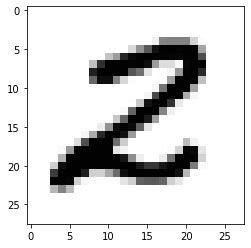

In [6]:
# +@. 앞서 구축한 딥러닝 모델을 이용한 visualization


"""----------------------------------Q5--------------------------------------"""
# Q5의 코드 중 일부를 변경(선택사항입니다)


# 루프 내에서 requires_grad 는 False로 설정, gradient 계산을 하지 않음
with torch.no_grad():
    correct = mnist_test.data.view(-1, 28 * 28).float().to(device)   #correct, total 을 tensor로 만들어야 오류가 안 생김
    total = mnist_test.targets.to(device)
    
    
    pred = linear(correct)  #correct는 tensor이어야 함
    
    
    #  한 곳에서 torch.argmax(pred, 1)와 total의 값이 같은 경우(True), ans_pred의 해당 위치에 1을 넣음
    ans_pred = torch.argmax(pred, 1) == total
    
    
    # (ans_pred 에 저장된 원소들의 평균) = 테스트 정확도
    # 예시) 10,000 개 중 8,900개가 True로 판정된 경우의 테스트 정확도 : 8,900 / 10,000 = 0.89 = 89 %
    accuracy = ans_pred.float().mean()
    print(accuracy)
        
    
    print('Test Accuracy for {} images: {:.2f}%'.format(len(total), accuracy.item() * 100))
    

"""--------------------------------------------------------------------------"""    
 
    
    
    
r = random.randint(0, len(mnist_test) - 1)


# 범위를 [r:r + 1]로 제한하여 이미지 개수 차원(1) 을 유지하며 그 차원이 [1, 28, 28]인 상태로 가져옴
# torch.nn.Linear() 는 3차원 연산을 할 수 없기에, (데이터 개수) X (28 * 28) 의 형태로 img를 2차원의 형태로 펼침
x_single_d = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
y_single_d = mnist_test.targets[r : r + 1].to(device)
single_pred = linear(x_single_d)


print("Label: ", y_single_d.item())
print("Prediction: ", torch.argmax(single_pred, 1).item())


plt.imshow(mnist_test.data[r : r + 1].view(28, 28), cmap = "Greys", interpolation="nearest")
plt.show()